In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




In [305]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [306]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [307]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [308]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [309]:
df.shape

(891, 12)

In [310]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [312]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [313]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [314]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

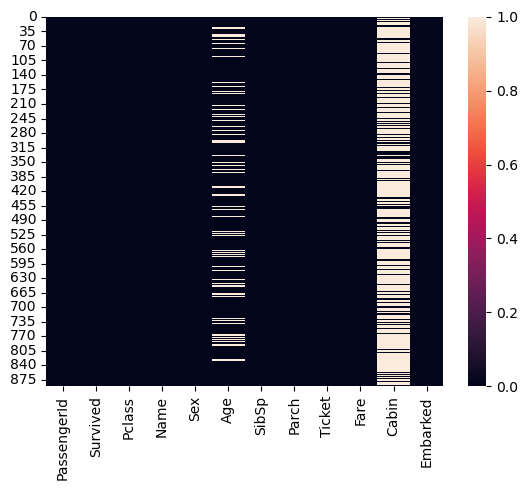

In [315]:
sns.heatmap(df.isnull())

In [316]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [317]:
df.shape

(891, 12)

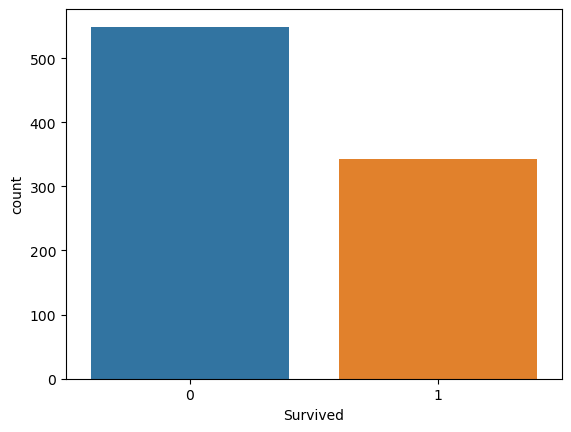

In [318]:
#visualize the data
sns.countplot(x= 'Survived', data= df)
plt.show()

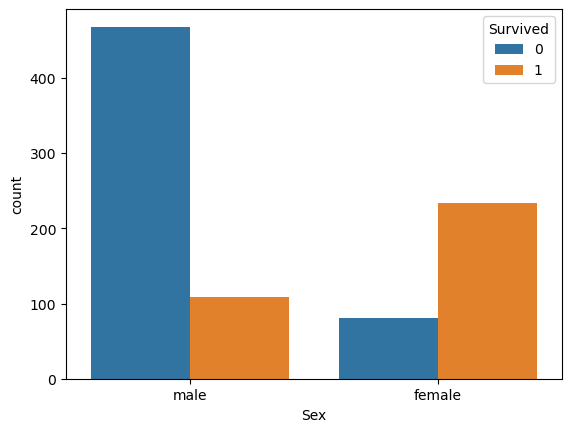

In [319]:
sns.countplot(x= 'Sex',hue ='Survived', data=df)
plt.show()

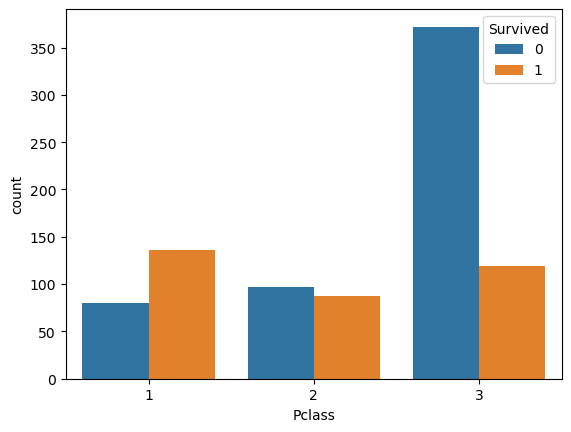

In [320]:
sns.countplot(x= 'Pclass',hue='Survived',data=df)
plt.show()

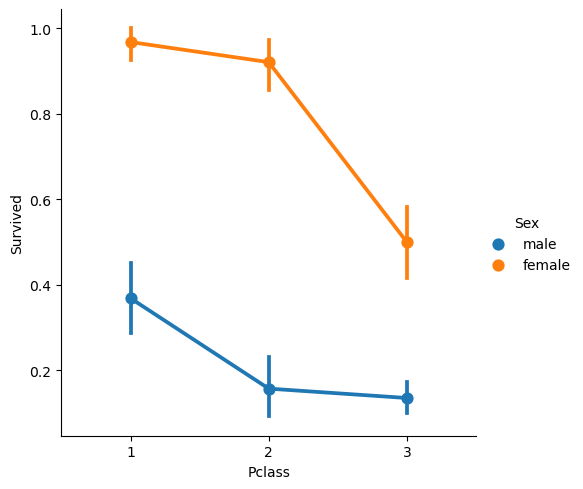

In [321]:
sns.catplot(x='Pclass',y='Survived',hue='Sex', kind ='point',data=df)
plt.show()

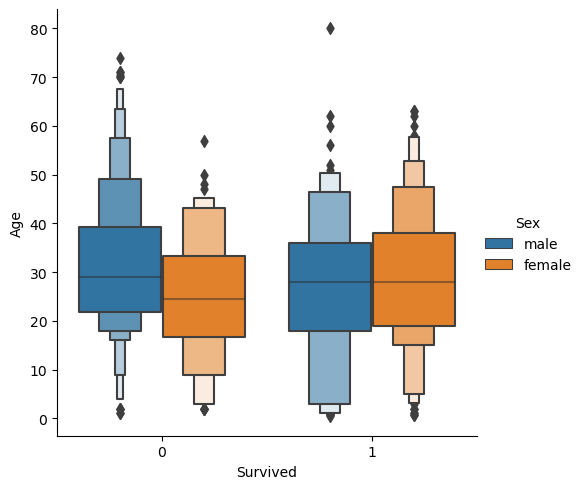

In [322]:
sns.catplot(y='Age',x='Survived',hue='Sex', kind='boxen', data= df)
plt.show()

In [324]:
#drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [325]:
#handle missing values
df['Age'].fillna(df['Age'].mode(),inplace=True)
df.dropna(inplace=True)

In [326]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [327]:
#Encode categorical variables
df['Sex']=df['Sex'].map({'female':0, 'male': 1})
df['Embarked']=df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [328]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,2
872,0,1,1,33.0,0,0,5.0000,2
879,1,1,0,56.0,0,1,83.1583,0
887,1,1,0,19.0,0,0,30.0000,2


In [335]:
#Encode categorical variables
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}) 
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [337]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,NaN,38.0,1,0,71.2833,NaN
3,1,1,NaN,35.0,1,0,53.1000,NaN
6,0,1,NaN,54.0,0,0,51.8625,NaN
10,1,3,NaN,4.0,1,1,16.7000,NaN
11,1,1,NaN,58.0,0,0,26.5500,NaN
...,...,...,...,...,...,...,...,...
871,1,1,NaN,47.0,1,1,52.5542,NaN
872,0,1,NaN,33.0,0,0,5.0000,NaN
879,1,1,NaN,56.0,0,1,83.1583,NaN
887,1,1,NaN,19.0,0,0,30.0000,NaN


In [364]:
df.fillna(0,inplace=True)

In [365]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0.0,38.0,1,0,71.2833,0.0
3,1,1,0.0,35.0,1,0,53.1000,0.0
6,0,1,0.0,54.0,0,0,51.8625,0.0
10,1,3,0.0,4.0,1,1,16.7000,0.0
11,1,1,0.0,58.0,0,0,26.5500,0.0
...,...,...,...,...,...,...,...,...
871,1,1,0.0,47.0,1,1,52.5542,0.0
872,0,1,0.0,33.0,0,0,5.0000,0.0
879,1,1,0.0,56.0,0,1,83.1583,0.0
887,1,1,0.0,19.0,0,0,30.0000,0.0


In [366]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [367]:
#Split the data into input (X) and target (y) variables
X = df.drop('Survived', axis=1)
y = df['Survived'] 


In [368]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [369]:
from sklearn.preprocessing import StandardScaler 

In [370]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [371]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0.0,38.0,1,0,71.2833,0.0
3,1,0.0,35.0,1,0,53.1000,0.0
6,1,0.0,54.0,0,0,51.8625,0.0
10,3,0.0,4.0,1,1,16.7000,0.0
11,1,0.0,58.0,0,0,26.5500,0.0
...,...,...,...,...,...,...,...
871,1,0.0,47.0,1,1,52.5542,0.0
872,1,0.0,33.0,0,0,5.0000,0.0
879,1,0.0,56.0,0,1,83.1583,0.0
887,1,0.0,19.0,0,0,30.0000,0.0


In [372]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [373]:
X_train.shape

(146, 7)

In [374]:
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.3,random_state=42)

In [375]:
dtc=DecisionTreeClassifier()

In [376]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [377]:
y_pred = dtc.predict(X_test)


In [378]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [379]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6363636363636364


In [380]:
# Train and evaluate the model
#Create a dictionary of hyperparameters for each model
lrparams = {'C': [0.01, 0.1, 1, 10]} 
dtparams = {'maxdepth': [3, 5, 7, 9]}
rfparams = {'nestimators': [50, 100, 150]}

In [381]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [382]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10]}



In [383]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [384]:
# Scale the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [385]:
from sklearn.svm import SVC


In [386]:
# Create the SVM Classifier object
svm = SVC()


In [387]:
# Create the GridSearchCV object
grid_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)


In [388]:
#Train the GridSearchCV object on the training dataset
grid_svm.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [389]:
 #Choose the best model based on accuracy score
best_svm = grid_svm.best_estimator_


In [390]:
# Print the best hyperparameters
print('Best Hyperparameters:', grid_svm.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 10}


In [391]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}



In [392]:
 #Create the KNN Classifier object
knn = KNeighborsClassifier()



In [393]:
# Create the GridSearchCV object
grid_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)



In [394]:
# Train the GridSearchCV object on the training dataset
grid_knn.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [395]:
# Print the best hyperparameters
print('Best Hyperparameters:', grid_knn.best_params_)

Best Hyperparameters: {'n_neighbors': 5}


In [396]:
# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 9]}

# Create the Decision Tree Classifier object
dt = DecisionTreeClassifier()



In [397]:
# Create the GridSearchCV object
grid_dt = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)



In [398]:
# Train the GridSearchCV object on the training dataset
grid_dt.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9]})

In [399]:
# Choose the best model based on accuracy score
best_dt = grid_dt.best_estimator_


In [274]:
# Print the best hyperparameters
print('Best Hyperparameters:', grid_dt.best_params_)

Best Hyperparameters: {'max_depth': 5}
